In [116]:
import kagglehub
import os
import kagglehub.config
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import datetime as dt

# Descargar Dataset

In [40]:
# current_folder = os.getcwd()

# kagglehub.config.DEFAULT_CACHE_FOLDER = current_folder
# datasets_path = kagglehub.dataset_download("kartik2112/fraud-detection", )


In [59]:
dataset_train = pd.read_csv(datasets_path + "\\fraudTrain.csv")
dataset_test = pd.read_csv(datasets_path + "\\fraudTest.csv")

In [60]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [55]:
dataset_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,1988-03-09,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,1978-06-21,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,1962-01-19,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,1967-01-12,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,1986-03-28,1325376186,38.674999,-78.632459,0


In [56]:
dataset_train.dropna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,1988-03-09,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,1978-06-21,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,1962-01-19,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,1967-01-12,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,1986-03-28,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,499,0,15.56,1,154,330,44,84735,37.7175,-112.4777,258,215,1961-11-24,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,2,1,51.70,1,856,813,20,21790,39.2667,-77.5101,100,360,1979-12-11,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,599,1,105.93,1,158,346,32,88325,32.9396,-105.8189,899,308,1967-08-30,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,509,1,74.90,1,433,471,41,57756,43.3526,-102.5411,1126,485,1980-08-18,1371816816,42.788940,-103.241160,0


In [43]:
dataset_train.shape

(1296675, 23)

In [113]:
dataset_train = dataset_train.drop(columns=["first", "last", "trans_num"])


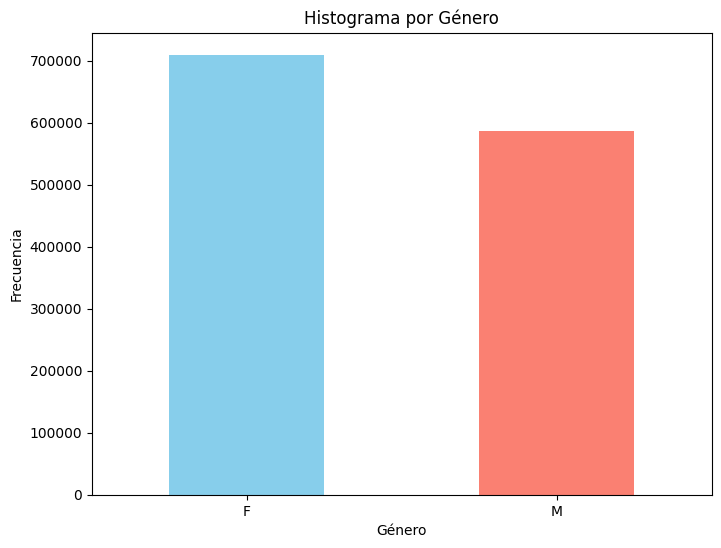

In [95]:
count_gender = dataset_train['gender'].value_counts()
plt.figure(figsize=(8, 6))
count_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Histograma por Género')
plt.xticks(rotation=0)
plt.show()

In [69]:
dataset_train['amt'].max()

np.float64(28948.9)

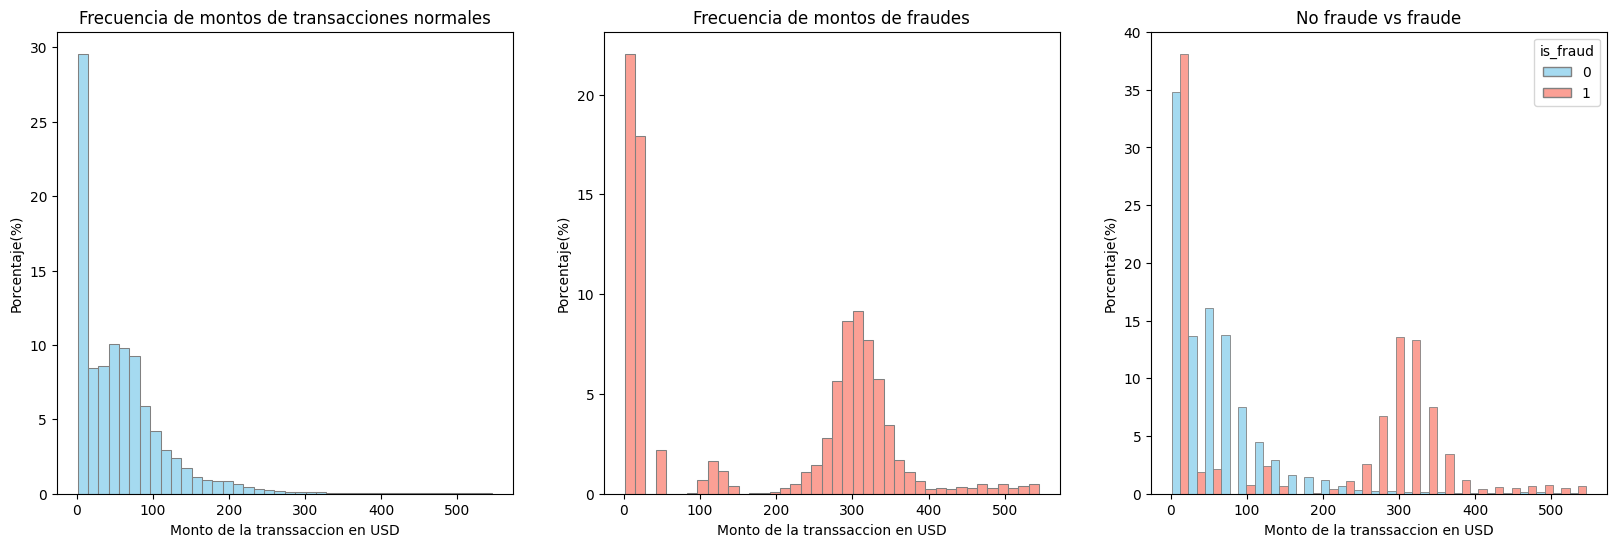

In [104]:

p99 = dataset_train["amt"].quantile(0.99)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(x='amt', data=dataset_train[(dataset_train['is_fraud'] == 0) & (dataset_train['amt'] <= p99)], stat='percent', bins=40, ax=ax[0], color='skyblue', edgecolor='grey')
ax[0].set_title('Frecuencia de montos de transacciones normales')
ax[0].set_xlabel('Monto de la transsaccion en USD')
ax[0].set_ylabel('Porcentaje(%)')

sns.histplot(x='amt', data=dataset_train[(dataset_train['is_fraud'] == 1) & (dataset_train['amt'] <= p99)], stat='percent', bins=40, ax=ax[1], color='salmon', edgecolor='grey')
ax[1].set_title('Frecuencia de montos de fraudes')
ax[1].set_xlabel('Monto de la transsaccion en USD')
ax[1].set_ylabel('Porcentaje(%)')

sns.histplot(x='amt', data=dataset_train[dataset_train.amt <= p99], hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=25, ax=ax[2], palette={0: '#87CEEB', 1: 'salmon'}, edgecolor='grey')
ax[2].set_title('No fraude vs fraude')
ax[2].set_xlabel('Monto de la transsaccion en USD')
ax[2].set_ylabel('Porcentaje(%)')

plt.show()

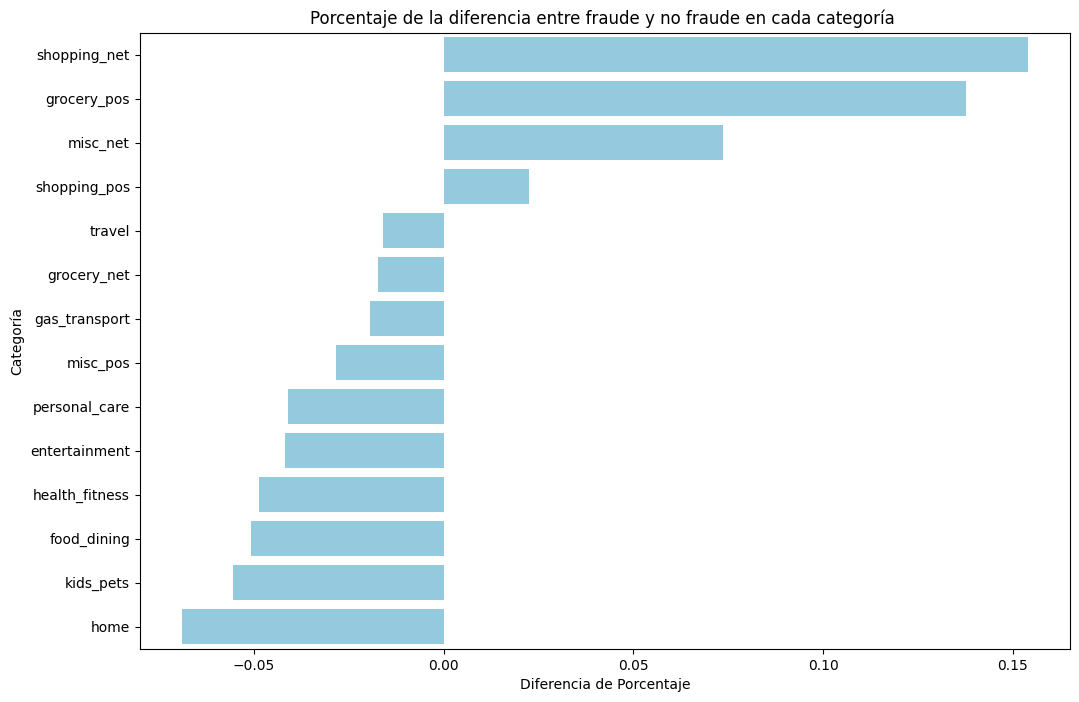

In [ ]:
a = dataset_train[dataset_train['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns = ['category', 'not fraud percentage']

b = dataset_train[dataset_train['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns = ['category', 'fraud percentage']
ab = a.merge(b,on='category')
ab['diff'] = ab['fraud percentage'] - ab['not fraud percentage']

plt.figure(figsize=(12, 8))
ax = sns.barplot(y='category', x='diff', data=ab.sort_values('diff', ascending=False), color='#87CEEB')
ax.set_xlabel('Diferencia de Porcentaje')
ax.set_ylabel('Categoría')
plt.title('Porcentaje de la diferencia entre fraude y no fraude en cada categoría ')

plt.show()

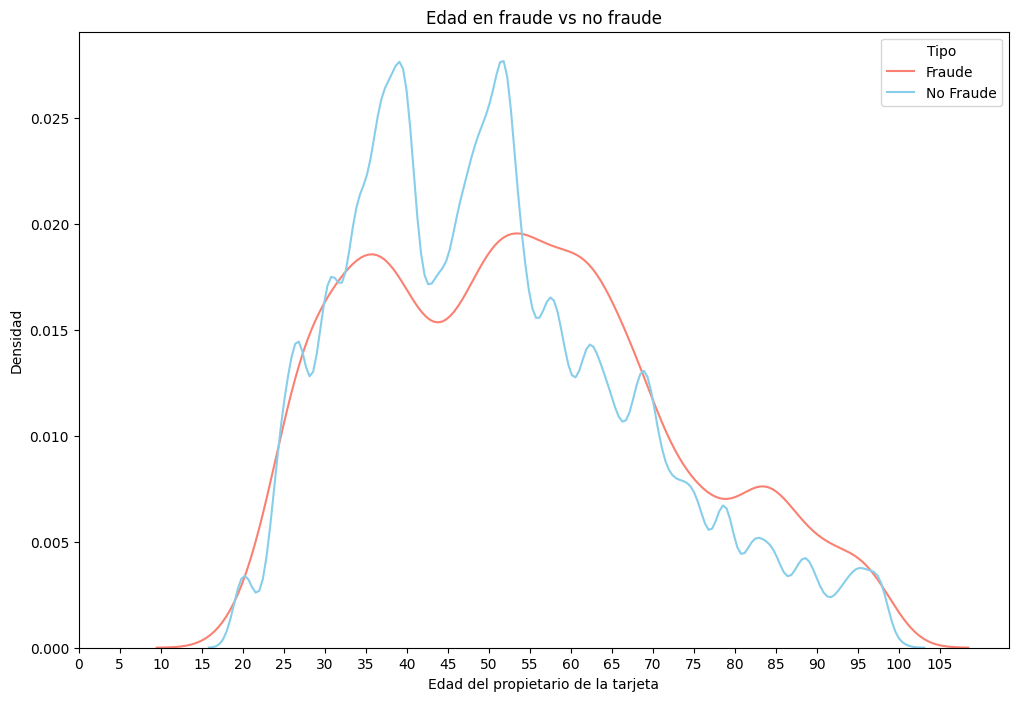

In [109]:
plt.figure(figsize=(12, 8))
dataset_train['age'] = dt.date.today().year - pd.to_datetime(dataset_train['dob']).dt.year
ax = sns.kdeplot(x='age', data=dataset_train, hue='is_fraud', common_norm=False, palette={0:'skyblue', 1:'salmon'})
ax.set_xlabel('Edad del propietario de la tarjeta')
ax.set_ylabel('Densidad')
plt.xticks(np.arange(0,110,5))
plt.title('Edad en fraude vs no fraude')
plt.legend(title='Tipo', labels=['Fraude', 'No Fraude'])

plt.show()

In [114]:
encoder = LabelEncoder()
dataset_train['category'] = encoder.fit_transform(dataset_train['category'])
dataset_train['city'] = encoder.fit_transform(dataset_train['city'])
dataset_train['street'] = encoder.fit_transform(dataset_train['street'])
dataset_train['job'] = encoder.fit_transform(dataset_train['job'])
dataset_train['state'] = encoder.fit_transform(dataset_train['state'])
dataset_train['gender'] = encoder.fit_transform(dataset_train['gender'])
dataset_train['merchant'] = encoder.fit_transform(dataset_train['merchant'])
dataset_train['dob'] = pd.to_datetime(dataset_train['dob'])
dataset_train['trans_date_trans_time'] = pd.to_datetime(dataset_train['trans_date_trans_time'])
dataset_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  int64         
 4   category               1296675 non-null  int64         
 5   amt                    1296675 non-null  float64       
 6   gender                 1296675 non-null  int64         
 7   street                 1296675 non-null  int64         
 8   city                   1296675 non-null  int64         
 9   state                  1296675 non-null  int64         
 10  zip                    1296675 non-null  int64         
 11  lat                    1296675 non-null  float64       
 12  long                   12966

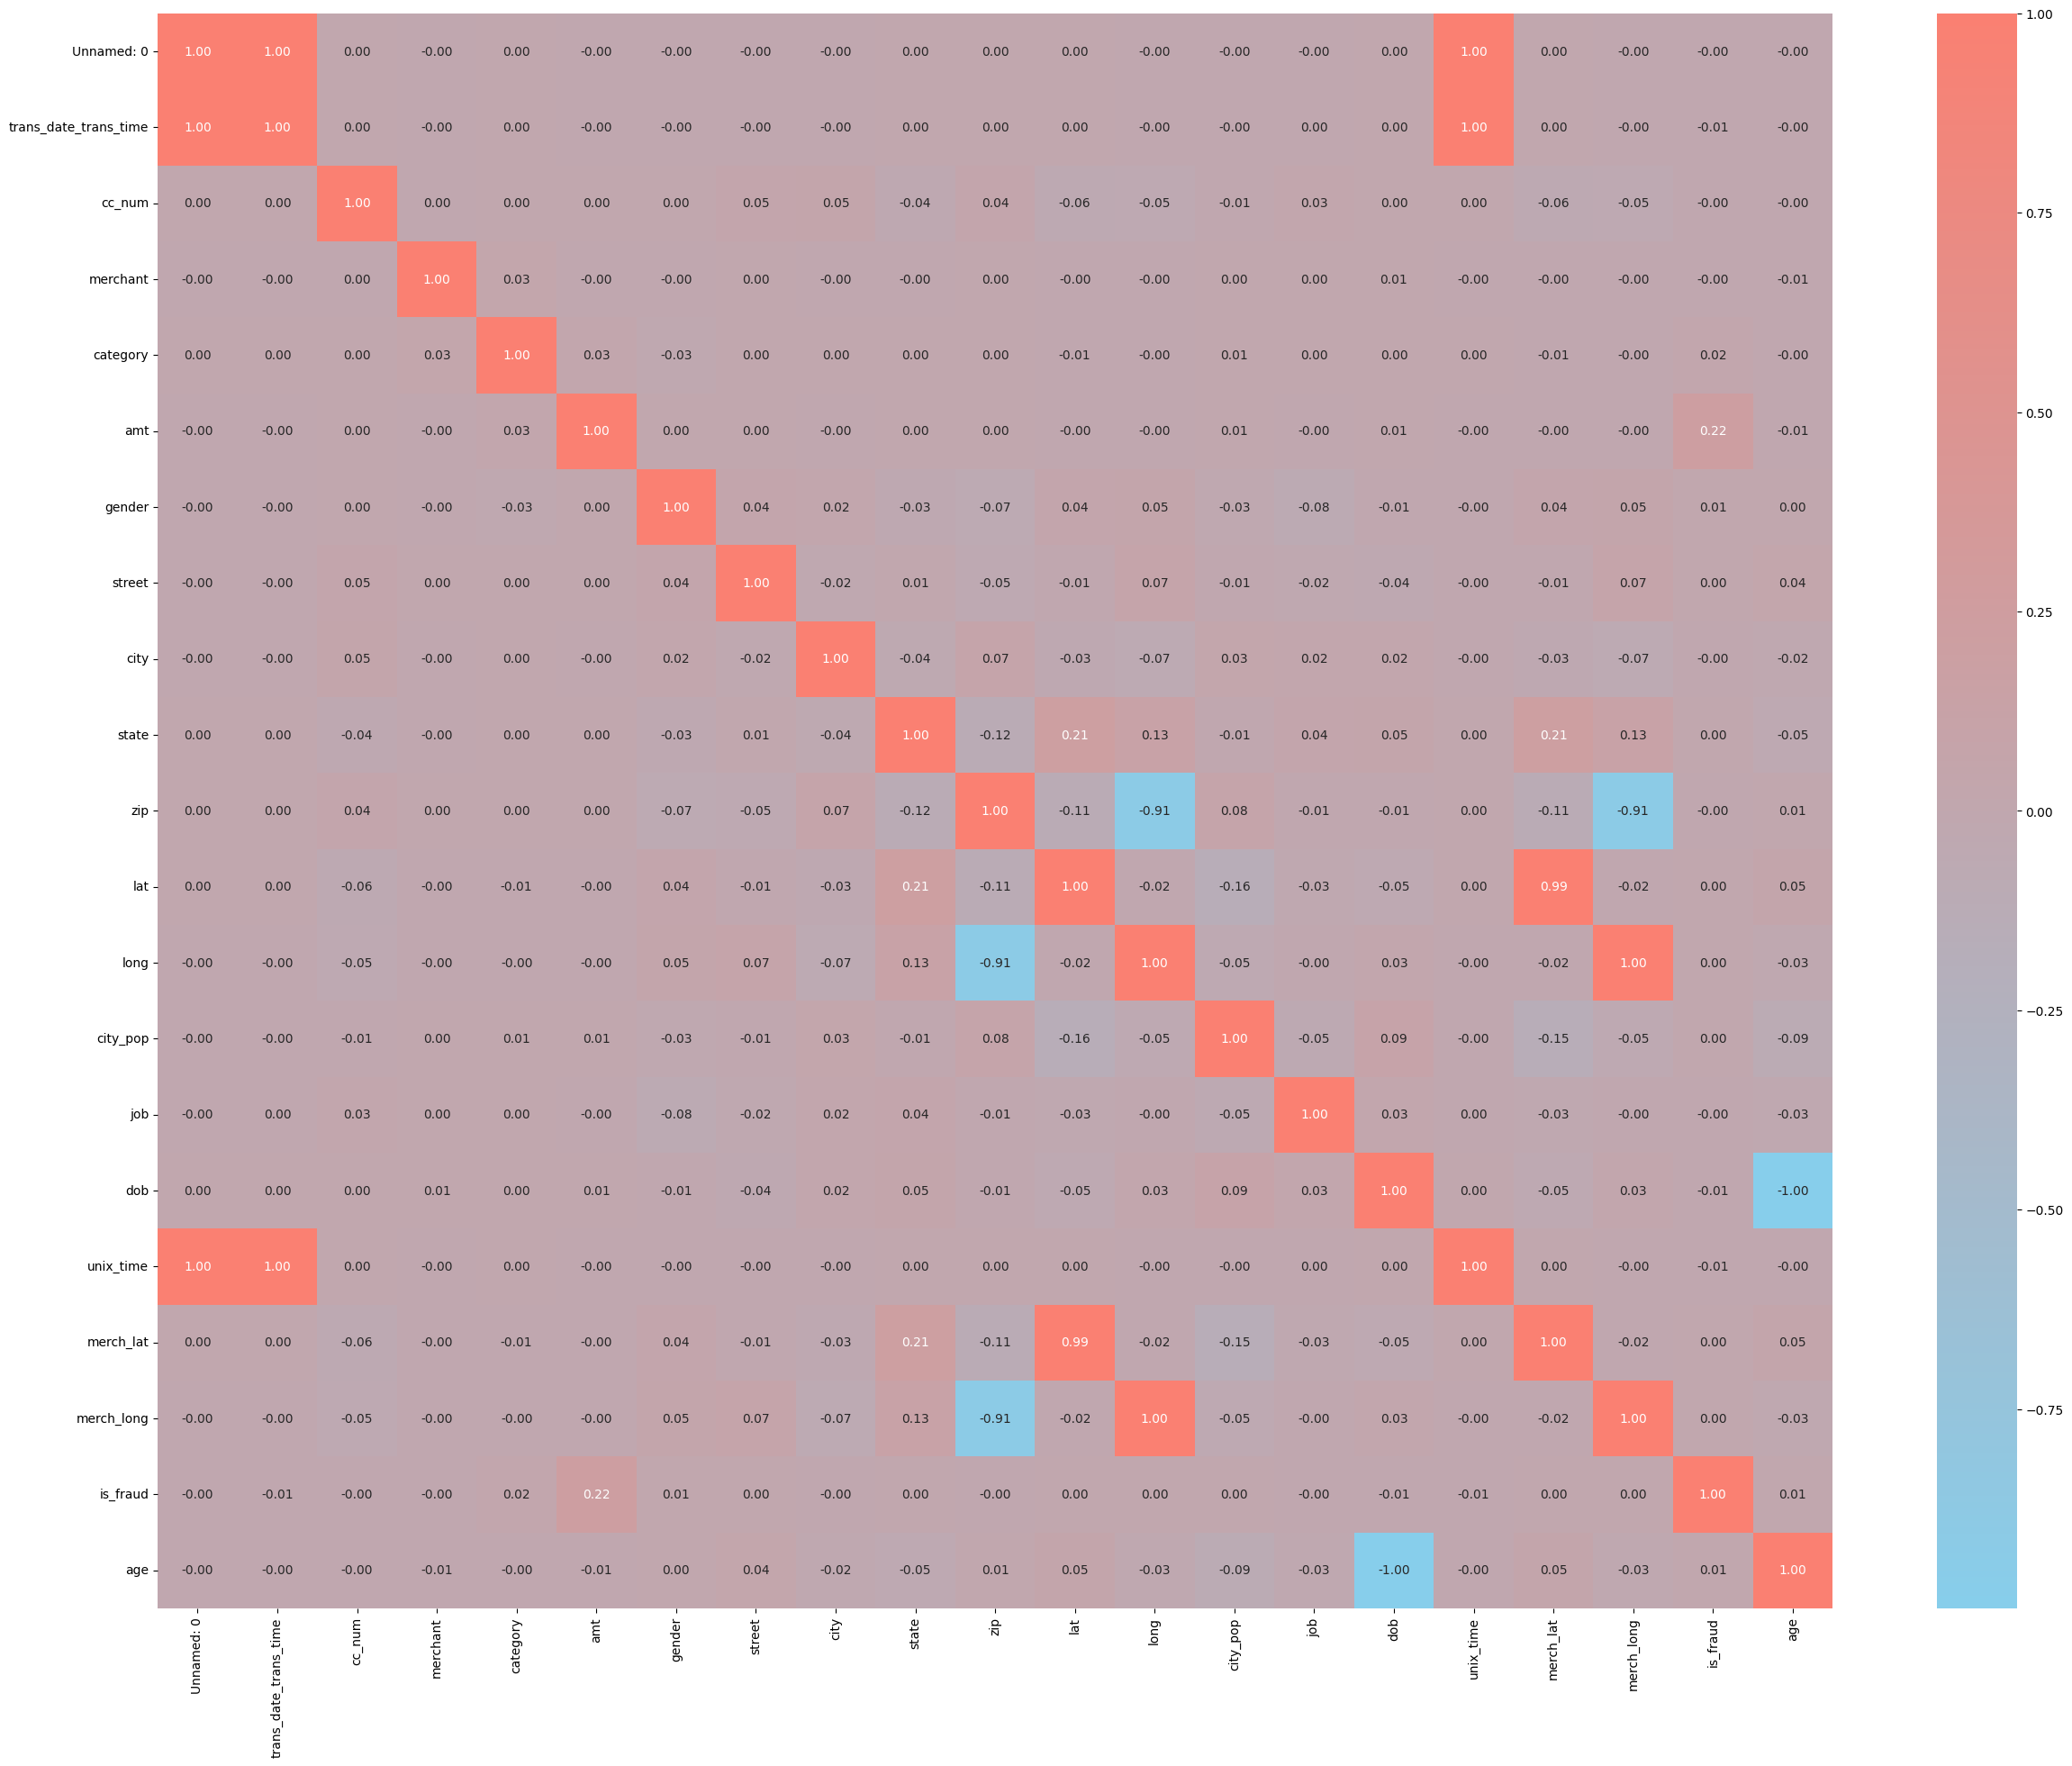

In [119]:
correlacion = dataset_train.corr()
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['skyblue', 'salmon'])
plt.figure(figsize=(30,23))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap=cmap, cbar=True)
plt.show()